In [2]:
%matplotlib inline

#packages for importing scholar data
# google scholar
from scholarly import scholarly
#scopus
from pybliometrics.scopus import AuthorRetrieval

import matplotlib.pyplot as plt
import numpy as np

In [4]:
search_query = scholarly.search_author('Kyle Murphy')
author = next(search_query).fill(sections=['basics','indices','counts'])
print(author)

{'affiliation': 'University of Maryland/NASA GSFC',
 'citedby': 1641,
 'citedby5y': 1208,
 'cites_per_year': {2009: 46,
                    2010: 46,
                    2011: 70,
                    2012: 66,
                    2013: 71,
                    2014: 127,
                    2015: 134,
                    2016: 184,
                    2017: 173,
                    2018: 232,
                    2019: 312,
                    2020: 172},
 'email': '@umd.edu',
 'filled': False,
 'hindex': 22,
 'hindex5y': 19,
 'i10index': 46,
 'i10index5y': 38,
 'id': 'n8I0sAwAAAAJ',
 'interests': [],
 'name': 'Kyle Murphy',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=n8I0sAwAAAAJ'}


In [28]:
citations = np.array(list(author.cites_per_year.values()), dtype=float)
year      = np.array(list(author.cites_per_year.keys()), dtype=float)

array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020.])

Text(1.0, 0.0, '              All  Since 2015\nCitations   1641        1208\nh-index     22          19\ni10-index     46          38')

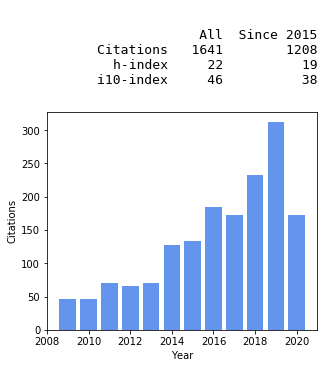

In [134]:
plt.style.use('seaborn-pastel')

# setup a simple figure
fig = plt.figure(figsize=(4.5,5),constrained_layout=True)
# setup a grid layout
gs  = fig.add_gridspec(4,1)

f_ax1 = fig.add_subplot(gs[1:,0])
f_ax1.bar(year,citations,color='cornflowerblue')
f_ax1.set_xlabel('Year')
f_ax1.set_ylabel('Citations')

f_ax2 = fig.add_subplot(gs[0,0])
f_ax2.axis('off')
f_ax2.axis([0,1,0,1])

#create text for scholar output plot
since_year = int(year.max()-5)

text = ''' {0:>16}  {1:5} {2:4}
Citations  {3:5}  {4:10}
h-index  {5:5}  {6:10}
i10-index  {7:5}  {8:10}'''.format('All', 'Since', since_year,
       author.citedby, author.citedby5y, 
       author.hindex, author.hindex5y,
       author.i10index, author.i10index5y)

f_ax2.text(1.,0.0,text,horizontalalignment='right', family='monospace', size=13)




In [ ]:
au = AuthorRetrieval(25723507400)

191